In [252]:
# Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error as mse

import pickle



In [253]:
# Import Data Frame 
df= pd.read_csv("data/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv")

In [254]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [255]:
df.dtypes

MONATSZAHL                         object
AUSPRAEGUNG                        object
JAHR                                int64
MONAT                              object
WERT                              float64
VORJAHRESWERT                     float64
VERAEND_VORMONAT_PROZENT          float64
VERAEND_VORJAHRESMONAT_PROZENT    float64
ZWOELF_MONATE_MITTELWERT          float64
dtype: object

Selecting the Features mentioned in description

In [256]:
data = df[['MONATSZAHL','AUSPRAEGUNG','JAHR','MONAT','WERT']]

In [257]:
data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [258]:
data = data.rename({'MONATSZAHL':'Category','AUSPRAEGUNG':'Accident_type','JAHR':'Year','MONAT':'Month','WERT':'Value'},axis=1)

In [259]:
data

,Category,Accident_type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [260]:
data['Category'].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

In [261]:
data['Accident_type'].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

In [262]:
data['Month'].unique()

array(['202201', '202202', '202203', '202204', '202205', '202206',
       '202207', '202208', '202209', '202210', '202211', '202212',
       'Summe', '202101', '202102', '202103', '202104', '202105',
       '202106', '202107', '202108', '202109', '202110', '202111',
       '202112', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '20150

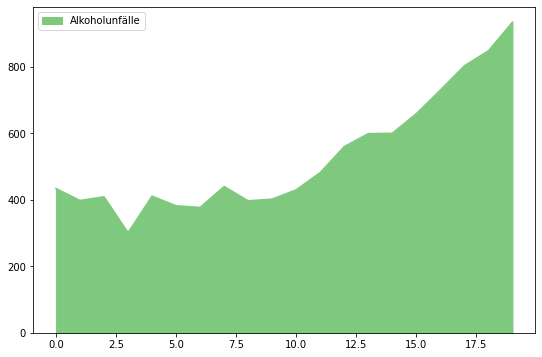

In [263]:

accidents = data[data['Year'] < 2020]

Verkehrsunfälle = accidents[(
    (accidents['Category'] == 'Verkehrsunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_type'] == 'insgesamt')
    )]
Fluchtunfälle = accidents[(
    (accidents['Category'] == 'Fluchtunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_type'] == 'insgesamt')
    )]
Alkoholunfälle = accidents[(
    (accidents['Category'] == 'Alkoholunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_type'] == 'insgesamt')
    )]

years = [i for i in range(2000, 2020)]
years = years.sort(reverse=True)

accidents_category = pd.DataFrame({
        "Alkoholunfälle": Alkoholunfälle['Value'].to_numpy()
    },
    index= years
)


accidents_category.plot(kind='area',colormap='Accent',)
plt.gcf().set_size_inches(9,6)


In [264]:
data['Month'].unique()

array(['202201', '202202', '202203', '202204', '202205', '202206',
       '202207', '202208', '202209', '202210', '202211', '202212',
       'Summe', '202101', '202102', '202103', '202104', '202105',
       '202106', '202107', '202108', '202109', '202110', '202111',
       '202112', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202012', '201901', '201902', '201903', '201904', '201905',
       '201906', '201907', '201908', '201909', '201910', '201911',
       '201912', '201801', '201802', '201803', '201804', '201805',
       '201806', '201807', '201808', '201809', '201810', '201811',
       '201812', '201701', '201702', '201703', '201704', '201705',
       '201706', '201707', '201708', '201709', '201710', '201711',
       '201712', '201601', '201602', '201603', '201604', '201605',
       '201606', '201607', '201608', '201609', '201610', '201611',
       '201612', '201501', '201502', '201503', '201504', '20150

<AxesSubplot:xlabel='count', ylabel='Accident_type'>

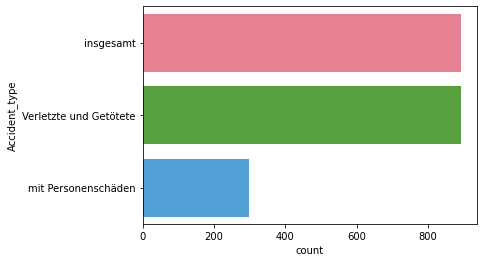

In [265]:
sns.countplot(y = "Accident_type",data=data,palette="husl")

<AxesSubplot:xlabel='count', ylabel='Category'>

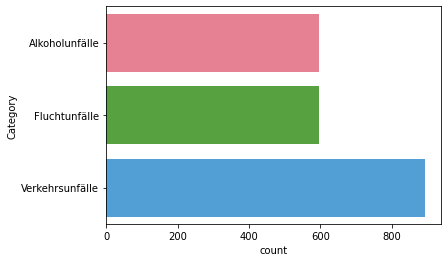

In [266]:
sns.countplot(y = "Category",data=data,palette="husl")

In [285]:
data = data.dropna()
data = data[data.Year < 2021]
data = data[data.Category == 'Alkoholunfälle']
data = data[data.Accident_type == 'insgesamt']
data = data[data.Month != 'Summe']

In [286]:
data['Month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [287]:
data['Month'] = data['Month'].str[-2:]

In [288]:
data

,Category,Accident_type,Year,Month,Value
26,Alkoholunfälle,insgesamt,2020,01,28.0
27,Alkoholunfälle,insgesamt,2020,02,40.0
28,Alkoholunfälle,insgesamt,2020,03,27.0
29,Alkoholunfälle,insgesamt,2020,04,26.0
30,Alkoholunfälle,insgesamt,2020,05,40.0
...,...,...,...,...,...
293,Alkoholunfälle,insgesamt,2000,08,77.0
294,Alkoholunfälle,insgesamt,2000,09,84.0
295,Alkoholunfälle,insgesamt,2000,10,83.0
296,Alkoholunfälle,insgesamt,2000,11,71.0


In [289]:
X = data[['Year','Month']]
y = data.Value

print(X)

     Year Month
26   2020    01
27   2020    02
28   2020    03
29   2020    04
30   2020    05
..    ...   ...
293  2000    08
294  2000    09
295  2000    10
296  2000    11
297  2000    12

[252 rows x 2 columns]


In [290]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [291]:
scaler = MinMaxScaler()

scaler.fit(X)
scaler.transform(X)

trainingData = pd.concat(
  [data['Value'].reset_index(drop = True),pd.DataFrame(scaler.transform(X),columns=['Year','Month'])],
  axis=1
)

print(trainingData)

     Value  Year     Month
0     28.0   1.0  0.000000
1     40.0   1.0  0.090909
2     27.0   1.0  0.181818
3     26.0   1.0  0.272727
4     40.0   1.0  0.363636
..     ...   ...       ...
247   77.0   0.0  0.636364
248   84.0   0.0  0.727273
249   83.0   0.0  0.818182
250   71.0   0.0  0.909091
251   85.0   0.0  1.000000

[252 rows x 3 columns]


In [292]:
X = trainingData[['Year','Month']]
y = trainingData['Value']

In [293]:
LR = LinearRegression()
model = LR.fit(X,y)

In [294]:
prediction = model.predict(X_test)

In [295]:
pickle.dump(model,open('model.pkl','wb'))